In [4]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, display

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
def binaryRep(num, num_bits, numpy_array=False):
    '''
    Calculates the binary representation for a given number of bits.
    Function requires that the parameter num is a positive integer.
    Parameters:
        num: Number whose binary value we want
        num_bit: Number of bits used in binary representation
        numpy_array: If True, return binary number stored in numpy array 
    Returns
        Binary representation of number with specified number of bits
    '''
    # Only unsigned integers will be accepted
    assert num >= 0, 'Negative Values are not acceptable'
    assert num%1 == 0, 'Number must be an integer'
    
    # Verify the number fits into specificed number of bits
    assert num <= (2**num_bits - 1), 'Number too large for that many bits'
    
    result = bin(num)[2:].zfill(num_bits) # Remove prefix and pad on left with zeros
    
    # Return type is by default a string but optionally can be in form a numpy array
    if numpy_array == True:
        result = np.array( [ int(num) for num in result  ] )
    
    return result

In [6]:
def rules1(a, b, c, rule_number):
    '''
    Determines next generation state for cell b, with neighbors a and c (left and right), based
    on the passed rule_number.
    Returns new state of cell b
    '''
    ruleset = binaryRep(rule_number, 8, numpy_array=True) # Generate 8-bit binary number representing rule number
    
    # Possible states - in same order as 'Nature of Code' docuement
    truple = [(1,1,1), (1,1,0), (1,0,1), (1,0,0), (0,1,1), (0,1,0), (0,0,1), (0,0,0)]
    
    # Make lookup dict, to associate each state with future state
    lookup_dict = {} # Initialize dictionary
    for indx,lmr in zip(range(8),truple): # Range is used to iterate through elements of ruleset (indices 0-7=range(8))
        lookup_dict[lmr] = ruleset[indx] 
        # Ex: 1st key:(1,1,1), 1st value: ruleset[0]= first digit of binary representation of rule_number
    
    return lookup_dict[a,b,c]


def cellular_step(cells, rule_number=126):
    '''
    Calculates the next generation state for 1D grid of cells.
    Parameters:
        cells: 1D Array containing current state of each cell
        rule_number: Integer from 0-255 indicating rule used to update state
    Returns
        New generation of 1D grid of cells
    '''
    newcells = np.zeros(len(cells), dtype=np.int8) # Array to hold new generation of state

    # For each cell in array: obtain state and states of neighbors, calculate new state using rules1 function
    # and update cell state in newcells
    for i in range(1,len(cells)-1):
        left = cells[i-1]
        middle = cells[i]
        right = cells[i+1]
        newstate = rules1(left, middle, right, rule_number)
        newcells[i] = newstate
        
    cells = newcells # Update cells to new generation and return
    return cells

In [13]:
class cellularAutomata:
    '''
    '''
    
    def __init__(self):
        ''' the __init__ method is run whenever an instance is created
        '''
        ncells = 64
        nsteps = 99
        self._init_step()
        
        self.cells = np.zeros(ncells, dtype=np.int8) # Create array of 64 zeros, of type 8-bit unsigned integer
        self.cells[ncells//2] = 1 # Set middle (or index below median) to 1

        self.grid = np.ndarray( [nsteps, len(self.cells)], dtype=np.int8 )
        self.grid.fill(0)

        self.grid[np.size(self.grid,0)-1] = self.cells
        
    def _init_step(self):
        '''
        '''
        self.stepnum = 0
        
    def step(self, nsteps=1):
        '''
        '''
        for i in range(nsteps):
            self.stepnum += 1
            for i in range( np.size(self.grid,0) - 1): # For all rows except the last
                self.grid[i] = self.grid[i+1] # Shift all rows up
            self.cells = cellular_step(self.cells, rule_number=126)
            self.grid[np.size(self.grid,0)-1, :] = self.cells
        return self
    
    def get_grid(self):
        '''
        '''
        return self.grid
    
    def plot(self, axes=None, flush=True):
        '''
        '''
        if axes is None:
            fig, axes = plt.subplots()
        axes.imshow( self.grid, cmap="gnuplot" )
        return self 

<IPython.core.display.Javascript object>


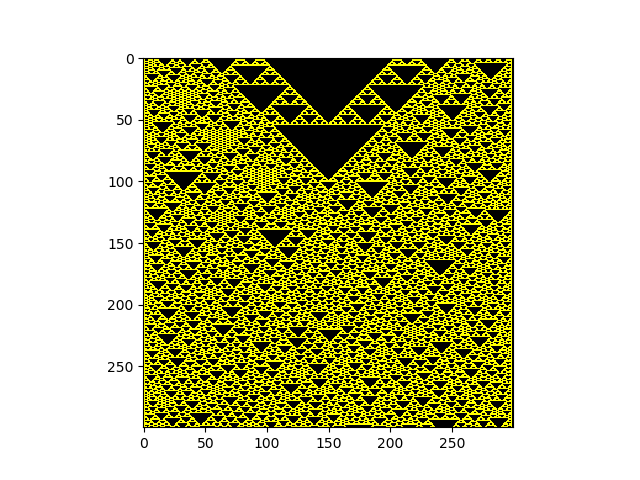

In [15]:
ccc = cellularAutomata()
ccc.step(500)
ccc.plot()

In [ ]:
#fig, axes = plt.subplots(1,6)
#cell = cellularAutomata()
#for i in range(6): 
#    cell.step()
#    cell.plot(axes=axes[i])          

In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, display

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


class cell_animate_HTML(cellularAutomata):   
    '''
    '''
    
    def _animate_init(self):
        '''     
        '''
        self.plt_imshow = plt.imshow( self.grid, cmap="gnuplot" )
        return self.plt_imshow,     
    
    def _animate_step(self, nsteps=9):
        '''
        '''
        self.step()
        self.plt_imshow.set_data(self.grid)  #faster than redrawing entire plot
        plt.gca().set_title(self.stepnum)
        return self.plt_imshow,
      
    def animate(self, nsteps=5):
        '''
        '''
        self._animate_init()
        fig = plt.gcf()
        
        anim = animation.FuncAnimation(fig, self._animate_step, 
            init_func=self._animate_init, frames=nsteps, blit=True) #        
        
        # equivalent to rcParams['animation.html'] = 'jshtml'
        rc('animation', html='jshtml')
        HTML(anim.to_jshtml())  
            
        self.anim = anim
        return anim

In [ ]:
celly = cell_animate_HTML()

In [ ]:
anim = celly.animate(5)

In [ ]:
nine = binaryRep(9, 4, numpy_array=True)
eight = binaryRep(8, 4, numpy_array=True)
print( nine, ' ', eight )
print( '9+8 in binary', binaryRep(9+8, 5) )